# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Data

In [3]:
# Importing updated dataframe with new columns and only high-activity customers from notebook 4.10 - Part 1

# Creating a path to project folder.
path = r'C:\Users\TanaT\(CF) Achievement 4 - Instacart Basket Analysis'

# Importing dataframe. 
df_updated =  pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'active_cust_and_dept_names.pkl'))    

In [4]:
# Checking dataframe.

df_updated.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,state,age,date_joined,n_dependants,fam_status,income,merge_status,department,region,customer_activity
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,both,snacks,Midwest,high
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Minnesota,81,8/1/2019,1,married,49620,both,snacks,Midwest,high
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Vermont,66,6/16/2018,2,married,158302,both,snacks,Northeast,high
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Hawaii,51,1/4/2019,2,married,57797,both,snacks,West,high
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,snacks,South,high


In [5]:
# Checking dataframe shape. 

df_updated.shape

(30964564, 35)

## Step 5 - Profiling Data

### Age Profile

In [8]:
# Checking statistics for age column.

df_updated['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

- Average age is around 49
- Min age is 18
- Max age is 81
- Most customers (50th and 75th percentile) are older (49 and over)
- Possible age groupings (<= 33 (young), >33 and <=65 (middle-aged), >65 (older))

#### Dividing ages into categories based on quartiles. 

In [12]:
# Grouping ages into categories based on the quartiles. 

# Classifying 'young' adults.
df_updated.loc[df_updated['age'] <= 33, 'age_category'] = 'Young adult'

# Classifying 'middle-aged' adults.
df_updated.loc[(df_updated['age'] > 33) & ( df_updated ['age'] < 65), 'age_category'] = 'Middle-aged adult'

# Classifying 'older' adults. 
df_updated.loc[df_updated['age'] >= 65, 'age_category'] = 'Senior'

In [13]:
# Checking age categories. 

df_updated['age_category'].value_counts(dropna = False)

age_category
Middle-aged adult    15011555
Senior                8195544
Young adult           7757465
Name: count, dtype: int64

Customer base is mostly comprised of middle-aged adults (those between 33-65), folllowed by seniors, then young adults. 

In [15]:
# Checking columns to see which other variables to work with. 

df_updated.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'ordering_behavior_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'merge_status', 'department',
       'region', 'customer_activity', 'age_category'],
      dtype='object')

In [16]:
# Step 7 - Aggregating the max, mean, and min variables for age profile. 
# Aggregating usage frequency and expenditure. 

# Expenditure (price) 

df_updated.groupby('age_category').agg({'prices': ['min', 'max', 'mean']})

prices                
                     min   max      mean
age_category                            
Middle-aged adult    1.0  25.0  7.790356
Senior               1.0  25.0  7.796715
Young adult          1.0  25.0  7.784572

This suggests that age alone doesn't play a role in expenditure. Other factors like income in combination with age may play a role and will be investigated. 

In [17]:
# Step 7 
# Usage frequency (median days between orders)

df_updated.groupby('age_category').agg({'median_days_between_orders': ['min', 'max', 'mean']})

median_days_between_orders                
                                         min   max      mean
age_category                                                
Middle-aged adult                        0.0  30.0  9.961348
Senior                                   0.0  30.0  9.933025
Young adult                              0.0  30.0  9.974473

- This suggests that age does not play a role in frequency of orders, as all age groups have similar mean frequencies.
- All age groups seem to go about 10 days between orders. 

In [19]:
# Checking age and average number of orders.
# Finding average number of orders for each age category. 

avg_order_age = df_updated.groupby('age_category')['order_number'].mean()
avg_order_age

age_category
Middle-aged adult    17.904057
Senior               17.784952
Young adult          17.750814
Name: order_number, dtype: float64

This suggests that age does not play a role in number of orders placed by customers, since all age groups have similar mean number of orders. 

In [22]:
# Checking age and when they make orders during the week. 
# Making a crosstab of the varibles. 

crosstab_age_dow = pd.crosstab(df_updated['orders_day_of_week'], df_updated['age_category'], dropna = False)
crosstab_age_dow

age_category,Middle-aged adult,Senior,Young adult
orders_day_of_week,,,
0,2858542,1566244,1483824
1,2622795,1417495,1371396
2,1957328,1065170,1002208
3,1778125,978350,913060
4,1759264,956161,909569
5,1956067,1066115,1011547
6,2079434,1146009,1065861


In [23]:
# Saving crosstab to clipboard. 

crosstab_age_dow.to_clipboard()

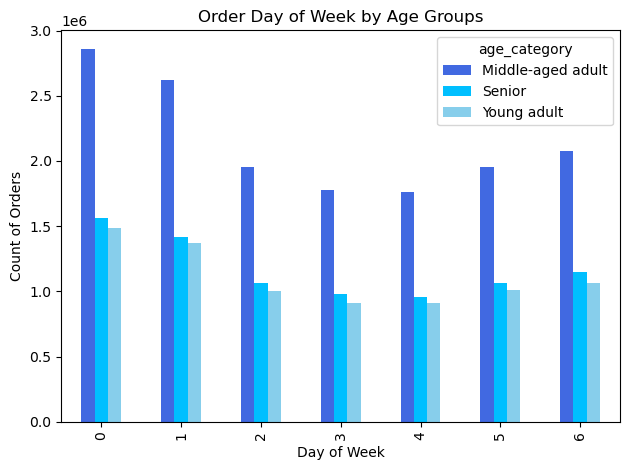

In [37]:
# Graphing crosstab. 

bar_1 = crosstab_age_dow.plot(kind = 'bar', color = ['royalblue', 'deepskyblue', 'skyblue'])
                                                

# Title 
plt.title ('Order Day of Week by Age Groups')
plt.xlabel ('Day of Week')
plt.ylabel ('Count of Orders')

# Layout
plt.tight_layout()

- All age categories place the most orders on Saturday and Sunday (0 and 1).
- This suggests that age does not play a role in ordering habits.
- This also suggests that ads should be run on other days during the week, when less orders are being placed (to improve sales).
- Other factors like hour of day will be checked to see if age plays a role. 

In [38]:
# Exporting bar chart. 

bar_1.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'age_order_day_of_week.png'),bbox_inches='tight')

In [39]:
# Checking age and what time of day they place orders. 
# Making a crosstab of variables. 

crosstab_age_hour = pd.crosstab(df_updated['order_hour_of_day'], df_updated['age_category'], dropna = False)
crosstab_age_hour

age_category,Middle-aged adult,Senior,Young adult
order_hour_of_day,,,
0,101028,53395,53619
1,53031,28688,27902
2,31012,17458,17221
3,22857,13395,12544
4,24132,13680,12951
5,40063,23286,21069
6,133272,75229,72512
7,415240,233067,214906
8,805737,441458,411915


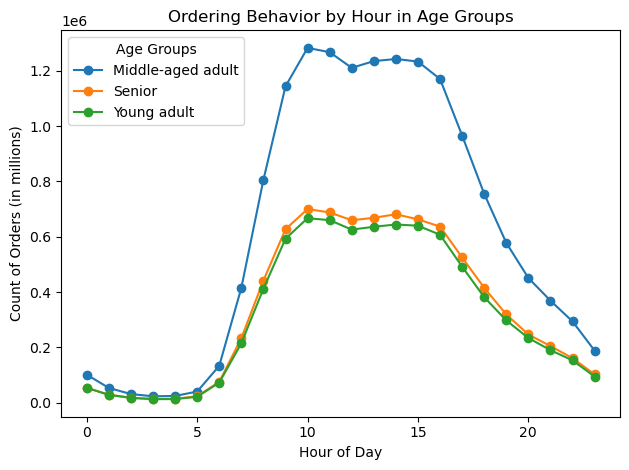

In [60]:
# Visualizing age and order hour during the day. 

line_age_order_hour = crosstab_age_hour.plot(kind='line', marker='o')

plt.xlabel('Hour of Day')
plt.ylabel('Count of Orders (in millions)')
plt.title('Ordering Behavior by Hour in Age Groups')
plt.legend(title='Age Groups')
plt.tight_layout()
plt.show()

- The line chart shows that each age group follows the same trend, but in varying degrees.
- Middle-aged adults place the most orders, followed by seniors, with young adults placing the least amount of orders.
- All age groups place the most orders around 10am (peak) - 3pm, where orders start to decrease and continue to do so for the rest of the day.
- The least amount of orders are placed before 5am. This could be a good time to run ads to try and boost sales during this time.

In [61]:
# Exporting line graph.

line_age_order_hour.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'line_age_order_hour.png'),bbox_inches='tight')

### Family Variables - Income Profile and Number of Dependents

In [43]:
# Making a new dataframe only containing variables related to the family/household.  

df_fam = df_updated[['income', 'n_dependants', 'age', 'fam_status']]

df_fam

,income,n_dependants,age,fam_status
0,49620,1,81,married
1,49620,1,81,married
2,158302,2,66,married
5,57797,2,51,married
6,34171,3,20,living with parents and siblings
...,...,...,...,...
32404853,128072,1,62,married
32404854,166687,1,47,married
32404856,100649,1,57,married
32404857,100649,1,57,married


In [44]:
# Checking statistics of family variables.

df_fam[['income', 'n_dependants', 'age']].agg(['min', 'max', 'mean'])

,income,n_dependants,age
min,25903.000000,0.000000,18.000000
max,593901.000000,3.000000,81.000000
mean,99675.865108,1.501819,49.468026


- Number of dependents range from 0 - 3.
- Min income is around 25,000.
- Max income is around 590,000.
- Mean income is around 99,600.

In [45]:
df_fam['fam_status'].mode()

0    married
Name: fam_status, dtype: object

- This shows that most customers are married. 

In [47]:
# Crosstab family status and number of dependents.

crosstab_fam_dep = pd.crosstab(df_fam['n_dependants'], df_fam['fam_status'], dropna = False)

crosstab_fam_dep

fam_status,divorced/widowed,living with parents and siblings,married,single
n_dependants,,,,
0,2645271,0,0,5094410
1,0,508045,7211061,0
2,0,484658,7248603,0
3,0,488469,7284047,0


In [ ]:
# Crosstab marital status and products - heatmap

In [ ]:
# Check income and expenditure (prices)
# Income and frequency of orders
# Income brackets and regions heat map?


In [ ]:
# Step 8 - Comparing age profile with regions. 
# Checking age categories vs. regions. 
# Where are these categories (more older in the west, east, etc?)

## Delete this later - 

Now I can use these groupings to then aggregate another variable - like average orders, marital status, what do they buy/popular departments, etc.

- Customer demographics bar chart - to show categories of customers and what they buy
- age categories and number of dependents
- age categories and marital status
- age categories and popular departments
- age categories and regions, or order hour
- male vs female? more single males or females?


#### Age and Family Status

In [ ]:
# Initial checks 
# Check variables - age, income, departments/goods, number of dependents
# Graph against 'orders_day_of_week' and 'order_hour_of_day'
# Create profiles like 'young parent' or 'single adult'

# maybe 'single adult' also includes no dependents, combine variables instead of just having stand alone variables?




def age_family_status_profile(row):
    if row['age'] <= 33 and row['number_of_dependents'] == 0:
        return 'Young single'
    elif row['age'] <= 33 and row['number_of_dependents'] >= 1:
        return 'Young family'
    elif row['age'] > 33 and row['number_of_dependents'] == 0:
        return 'Older single'
    elif row['age'] > 33 and row['age'] <= 65 and row['number_of_dependents'] >= 1:
        return 'Older family'
    else:
        return 'Other'

# then       
df_2['age_family_status'] = df_2.apply(age_family_status_profile, axis=1)


#### Departments